In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# Loading the Data 

In [3]:
df= pd.read_csv('D:\\dsa\\mushrooms.csv')


In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
# no. of rows  & columns
df.shape

(8124, 23)

In [7]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
# checking statistics
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
#Check for missing values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
#Check for duplicate values
df.duplicated().sum()

0

In [13]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [14]:
# For the  statistical analyzes, data must be of a numerical type. So  we'll do the Label Encoding event here. Label Encoding is the conversion of categorical data to the corresponding integers.

In [15]:
# Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder class

label_encoder = LabelEncoder()  # Create a instance for the label encoder
encoded_data = pd.DataFrame()  # Create empty DataFrame

for column in df.columns:
    encoded_data[column] = label_encoder.fit_transform(df[column])  # Iterate all columns and transform its values

In [51]:
data =df
encoded_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [19]:
# Correlation

In [20]:
encoded_data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


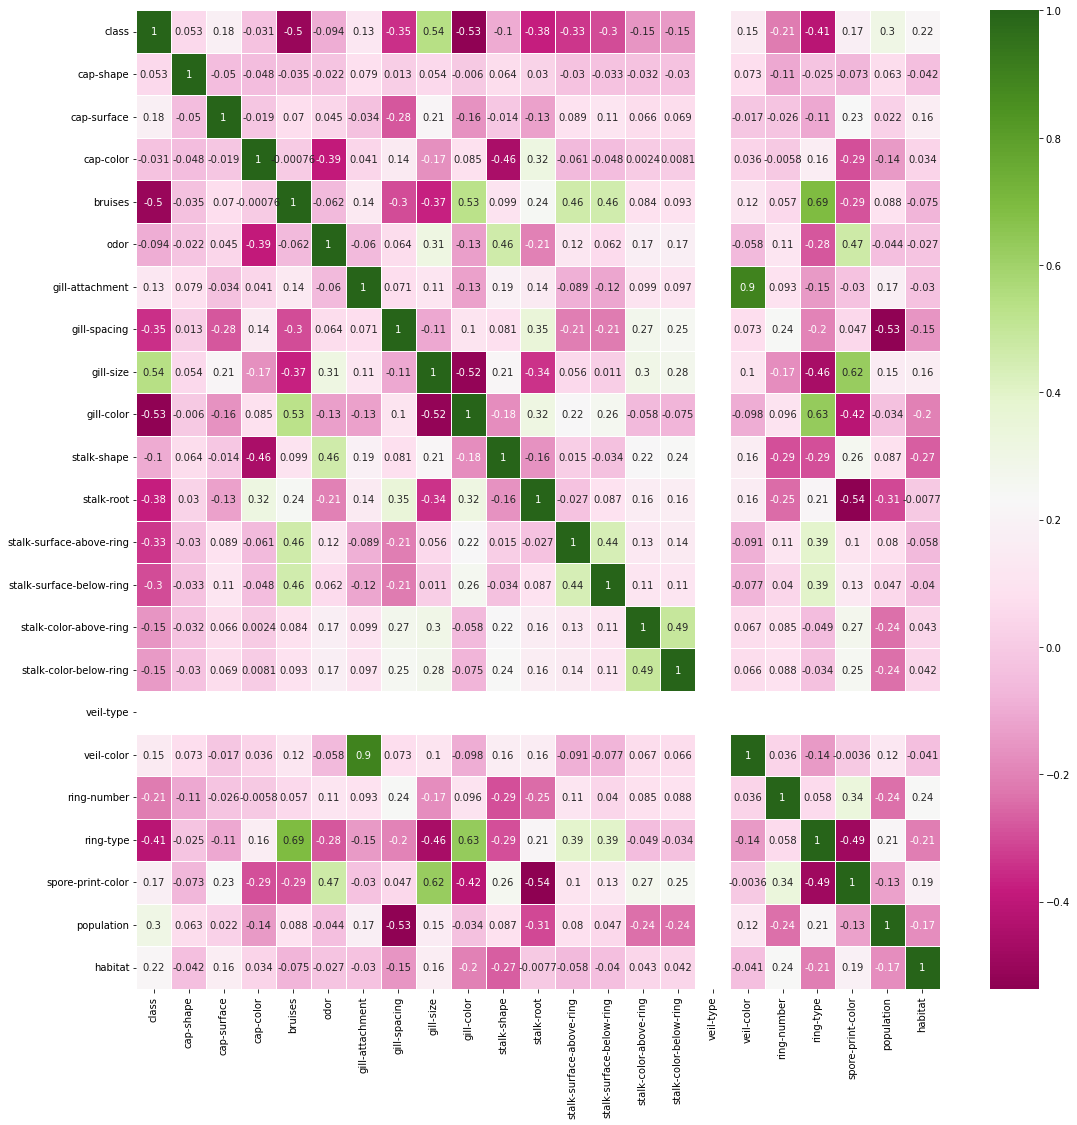

In [22]:
fig, axes = plt.subplots(figsize=(18, 18)) 
sns.heatmap(data=encoded_data.corr(), annot=True, linewidths=.5, cmap="PiYG", ax=axes)  
plt.show()

In [ ]:
# "veil-type" has  a single value for all records so there is no correlation.

In [9]:
#  EDA

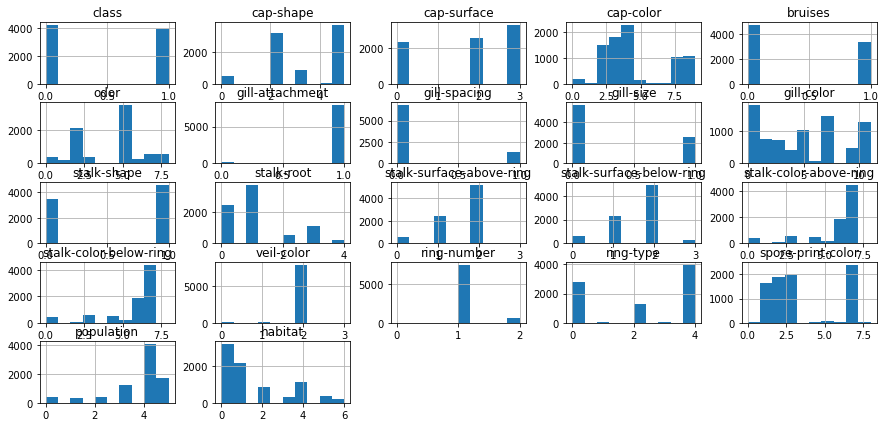

In [49]:
# checking distribution 
numfea = encoded_data.drop(['veil-type'], axis=1).select_dtypes(exclude='object')
numfea.hist(figsize= (15,7))
plt.show()



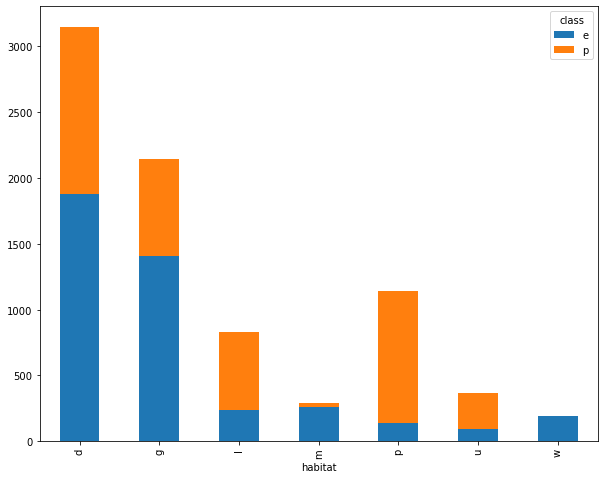

In [53]:
fig, ax = plt.subplots(figsize=(10,8))  
data.groupby(['habitat', 'class']).size().unstack().plot.bar(stacked=True, ax=ax) 
plt.show()

In [57]:
encoded_data.drop([ "veil-type"], axis=1, inplace=True) 
encoded_data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [58]:
# Split Data and Target

In [59]:
X = encoded_data.drop(["class"], axis=1)  # Put all data (except "class" column) to the X variable
y = encoded_data["class"] # Put only "class" column to the Y variable

In [60]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [64]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [65]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [66]:
# Scaling of Data

In [67]:
from sklearn.preprocessing import StandardScaler  
std_scaler = StandardScaler() 

X = std_scaler.fit_transform(X) 

In [68]:
# Preparation of Test & Train Data

In [69]:
from sklearn.model_selection import train_test_split  

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Models

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
# 1 Logistic Regression

In [101]:
clf =  LogisticRegression() 
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test, y_pred))
print("Train Score for Logistic Regression: ", logistic_regression_cls.score(x_train, y_train)) 
print("Test Score for Logistic Regression: ", logistic_regression_cls.score(x_test, y_test)) 
params = logistic_regression_cls.get_params()
print(params)

Classification Model: LogisticRegression
Confusion Matrix: 
 [[799  44]
 [ 34 748]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       843
           1       0.94      0.96      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Train Score for Logistic Regression:  0.9572241883366672
Test Score for Logistic Regression:  0.952
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 13, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [81]:
# 2 Decision Tree

In [102]:
clf = DecisionTreeClassifier() 
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test, y_pred))
print("Train Score for Decision Tree: ", decision_tree_cls.score(x_train, y_train))  
print("Test Score for Decision Tree: ", decision_tree_cls.score(x_test, y_test)) 
params = decision_tree_cls.get_params()
print(params)

Classification Model: DecisionTreeClassifier
Confusion Matrix: 
 [[843   0]
 [  0 782]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Train Score for Decision Tree:  1.0
Test Score for Decision Tree:  1.0
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 13, 'splitter': 'best'}


In [83]:
# 3 Random Forest

In [103]:
clf = RandomForestClassifier() 
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test, y_pred))
print("Train Score for Random Forest: ", random_forest_cls.score(x_train, y_train))  
print("Test Score for Random Forest: ", random_forest_cls.score(x_test, y_test))
params = random_forest_cls.get_params()
print(params)

Classification Model: RandomForestClassifier
Confusion Matrix: 
 [[843   0]
 [  0 782]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Train Score for Random Forest:  1.0
Test Score for Random Forest:  1.0
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 13, 'verbose': 0, 'warm_start': False}


In [85]:
# 4 K-NN 

In [97]:
clf = KNeighborsClassifier() 
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test, y_pred))
print("Train Score for K-NN: ", knn_cls.score(x_train, y_train))  
print("Test Score for K-NN: ", knn_cls.score(x_test, y_test)) 
params = knn_cls.get_params()
print(params)

Classification Model: KNeighborsClassifier
Confusion Matrix: 
 [[843   0]
 [  0 782]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Train Score for K-NN:  1.0
Test Score for K-NN:  1.0
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [87]:
# 5 Gaussian Naive Bayes

In [96]:
clf = GaussianNB()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('Classification Model: {}'.format(clf.__class__.__name__))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred))
print('Classification Report: \n',classification_report(y_test, y_pred))
print("Train Score for Gaussian Naive Bayes: ", naive_bayes_cls.score(x_train, y_train))  
print("Test Score for Gaussian Naive Bayes: ", naive_bayes_cls.score(x_test, y_test)) 
params = naive_bayes_cls.get_params()
print(params)

Classification Model: GaussianNB
Confusion Matrix: 
 [[771  72]
 [ 55 727]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       843
           1       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625

Train Score for Gaussian Naive Bayes:  0.9235266964148331
Test Score for Gaussian Naive Bayes:  0.9218461538461539
{'priors': None, 'var_smoothing': 1e-09}


In [104]:
# Hyperparameter Tuning with Grid search

In [107]:
# Logic Regression


In [105]:
parameters_LR = {"C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 "penalty" : ["l1", "l2"]}

grid_search_LR = GridSearchCV(logistic_regression_cls, parameters_LR, cv=6, n_jobs=-1, return_train_score=True)

# Fit Grid Search model with data:
grid_search_LR.fit(x_train, y_train)

# Show results for all combinations:
pd.DataFrame(grid_search_LR.cv_results_)[["params", "mean_fit_time", "mean_train_score", "mean_test_score"]]

,params,mean_fit_time,mean_train_score,mean_test_score
0,"{'C': 0.001, 'penalty': 'l1'}",0.009357,NaN,NaN
1,"{'C': 0.001, 'penalty': 'l2'}",0.060654,0.904262,0.904447
2,"{'C': 0.01, 'penalty': 'l1'}",0.004320,NaN,NaN
3,"{'C': 0.01, 'penalty': 'l2'}",0.049620,0.939098,0.937529
4,"{'C': 0.1, 'penalty': 'l1'}",0.002548,NaN,NaN
5,"{'C': 0.1, 'penalty': 'l2'}",0.063365,0.950423,0.949377
6,"{'C': 1, 'penalty': 'l1'}",0.006520,NaN,NaN
7,"{'C': 1, 'penalty': 'l2'}",0.123658,0.956824,0.955224
8,"{'C': 10, 'penalty': 'l1'}",0.003998,NaN,NaN
9,"{'C': 10, 'penalty': 'l2'}",0.176897,0.967010,0.965533


In [106]:
grid_search_LR.best_params_ 

{'C': 1000, 'penalty': 'l2'}

In [110]:
# Decision Tree

In [114]:
parameters_DT = {"max_depth" : np.arange(3, 20)}

grid_search_DT = GridSearchCV(decision_tree_cls, parameters_DT, cv=6, n_jobs=-1, return_train_score=True)

# Fit Grid Search model with data:
grid_search_DT.fit(x_train, y_train)

# Show results for all combinations:
pd.DataFrame(grid_search_DT.cv_results_)[["params", "mean_fit_time", "mean_train_score", "mean_test_score"]]

,params,mean_fit_time,mean_train_score,mean_test_score
0,{'max_depth': 3},0.023631,0.960302,0.960301
1,{'max_depth': 4},0.024181,0.978612,0.978612
2,{'max_depth': 5},0.026150,0.981443,0.981382
3,{'max_depth': 6},0.028874,0.995938,0.995383
4,{'max_depth': 7},0.026488,0.998708,0.998153
5,{'max_depth': 8},0.026237,1.000000,1.000000
6,{'max_depth': 9},0.025846,1.000000,1.000000
7,{'max_depth': 10},0.024165,1.000000,1.000000
8,{'max_depth': 11},0.027980,1.000000,1.000000
9,{'max_depth': 12},0.027559,1.000000,1.000000


In [115]:
grid_search_DT.best_params_

{'max_depth': 8}

In [111]:
# 3 Random Forest

In [116]:
parameters_RF = {"max_depth" : np.arange(5, 15),
                 "n_estimators" : [100, 200, 300]}

grid_search_RF = GridSearchCV(random_forest_cls, parameters_RF, cv=6, n_jobs=-1, return_train_score=True)

# Fit Grid Search model with data:
grid_search_RF.fit(x_train, y_train)

# Show results for all combinations:
pd.DataFrame(grid_search_RF.cv_results_)[["params", "mean_fit_time", "mean_train_score", "mean_test_score"]]

,params,mean_fit_time,mean_train_score,mean_test_score
0,"{'max_depth': 5, 'n_estimators': 100}",0.643190,0.990429,0.990460
1,"{'max_depth': 5, 'n_estimators': 200}",1.283460,0.990645,0.990306
2,"{'max_depth': 5, 'n_estimators': 300}",1.939127,0.990552,0.990614
3,"{'max_depth': 6, 'n_estimators': 100}",0.647630,0.994245,0.993846
4,"{'max_depth': 6, 'n_estimators': 200}",1.282158,0.994245,0.994461
5,"{'max_depth': 6, 'n_estimators': 300}",1.930779,0.993968,0.993999
6,"{'max_depth': 7, 'n_estimators': 100}",0.651937,0.998030,0.997846
7,"{'max_depth': 7, 'n_estimators': 200}",1.349738,0.997815,0.997846
8,"{'max_depth': 7, 'n_estimators': 300}",2.046453,0.998000,0.997538
9,"{'max_depth': 8, 'n_estimators': 100}",0.796159,1.000000,1.000000


In [117]:
grid_search_RF.best_params_

{'max_depth': 8, 'n_estimators': 100}

In [112]:
# KNN

In [118]:
parameters_KNN = {"n_neighbors" : np.arange(2, 30)}

grid_search_KNN = GridSearchCV(knn_cls, parameters_KNN, cv=6, n_jobs=-1, return_train_score=True)

# Fit Grid Search model with data:
grid_search_KNN.fit(x_train, y_train)

# Show results for all combinations:
pd.DataFrame(grid_search_KNN.cv_results_)[["params", "mean_fit_time", "mean_train_score", "mean_test_score"]]

,params,mean_fit_time,mean_train_score,mean_test_score
0,{'n_neighbors': 2},0.018570,0.999969,0.999692
1,{'n_neighbors': 3},0.007359,1.000000,1.000000
2,{'n_neighbors': 4},0.004271,0.999938,0.999846
3,{'n_neighbors': 5},0.005356,1.000000,1.000000
4,{'n_neighbors': 6},0.005837,0.999846,0.999538
5,{'n_neighbors': 7},0.005560,0.999908,0.999846
6,{'n_neighbors': 8},0.004378,0.999754,0.999538
7,{'n_neighbors': 9},0.009289,0.999877,0.999692
8,{'n_neighbors': 10},0.005866,0.999200,0.998154
9,{'n_neighbors': 11},0.006203,0.999292,0.998461


In [119]:
grid_search_KNN.best_params_

{'n_neighbors': 3}

In [120]:
# Rebuild Models with Tuned Hyperparameters

In [121]:
# Logistic Regression Classifier:
logistic_regression_cls_tuned = LogisticRegression(C=0.1, penalty="l2", random_state=13)
logistic_regression_cls_tuned.fit(x_train, y_train)

# Decision Tree Classifier:
decision_tree_cls_tuned = DecisionTreeClassifier(max_depth=14, random_state=13)
decision_tree_cls_tuned.fit(x_train, y_train)

# Random Forest Classifier:
random_forest_cls_tuned = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=13)
random_forest_cls_tuned.fit(x_train, y_train)


# K-Nearest Neighbors Classifier:
knn_cls_tuned = KNeighborsClassifier(n_neighbors=3)
knn_cls_tuned.fit(x_train, y_train)

# Gaussian Naive Bayes Classifier (Not Changed):
naive_bayes_cls_tuned = GaussianNB()
naive_bayes_cls_tuned.fit(x_train, y_train)


GaussianNB()

In [123]:
print("Test Score for Logistic Regression: ", logistic_regression_cls_tuned.score(x_test, y_test))
print("Test Score for Decision Tree: ", decision_tree_cls_tuned.score(x_test, y_test))
print("Test Score for Random Forest: ", random_forest_cls_tuned.score(x_test, y_test))
print("Test Score for K-NN: ", knn_cls_tuned.score(x_test, y_test))
print("Test Score for Gaussian Naive Bayes: ", naive_bayes_cls_tuned.score(x_test, y_test))

Test Score for Logistic Regression:  0.947076923076923
Test Score for Decision Tree:  1.0
Test Score for Random Forest:  1.0
Test Score for K-NN:  1.0
Test Score for Gaussian Naive Bayes:  0.9218461538461539


In [127]:
# Evaluating Logistic regression

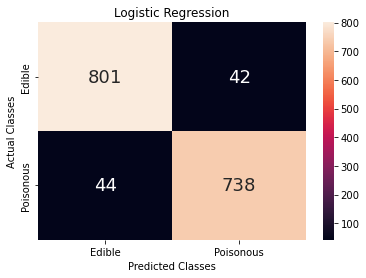

In [125]:
# Prediction of test dataset:
y_pred_LR = logistic_regression_cls_tuned.predict(x_test)

# Find confusion matrix for this model:
confusion_matrix_LR = confusion_matrix(y_test, y_pred_LR)

# Plot confusion matrix with Heatmap:
cm_dataframe_LR = pd.DataFrame(confusion_matrix_LR, index=["Edible", "Poisonous"], columns=["Edible", "Poisonous"])
sns.heatmap(cm_dataframe_LR, annot=True, annot_kws={"size": 18}, fmt="d")
plt.title("Logistic Regression")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
plt.show()

In [126]:
report_LR = pd.DataFrame(classification_report(y_test, y_pred_LR, 
                                               output_dict=True, 
                                               target_names=["Edible", "Poisonous"]))
report_LR

,Edible,Poisonous,accuracy,macro avg,weighted avg
precision,0.947929,0.946154,0.947077,0.947041,0.947075
recall,0.950178,0.943734,0.947077,0.946956,0.947077
f1-score,0.949052,0.944942,0.947077,0.946997,0.947074
support,843.000000,782.000000,0.947077,1625.000000,1625.000000


In [128]:
#Evaluating Decision Tree Classifier

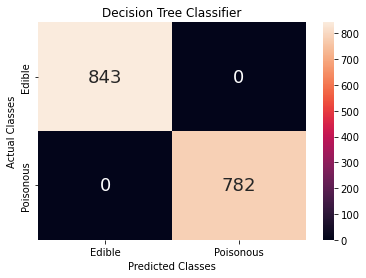

In [129]:
y_pred_DT = decision_tree_cls_tuned.predict(x_test)

# Find confusion matrix for this model:
confusion_matrix_DT = confusion_matrix(y_test, y_pred_DT)

# Plot confusion matrix with Heatmap:
cm_dataframe_DT = pd.DataFrame(confusion_matrix_DT, index=["Edible", "Poisonous"], columns=["Edible", "Poisonous"])
sns.heatmap(cm_dataframe_DT, annot=True, annot_kws={"size": 18}, fmt="d")
plt.title("Decision Tree Classifier")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
plt.show()

In [130]:
report_DT = pd.DataFrame(classification_report(y_test, y_pred_DT, 
                                               output_dict=True, 
                                               target_names=["Edible", "Poisonous"]))
report_DT

,Edible,Poisonous,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,843.0,782.0,1.0,1625.0,1625.0


In [131]:
# Evaluating Random Forest Classifier

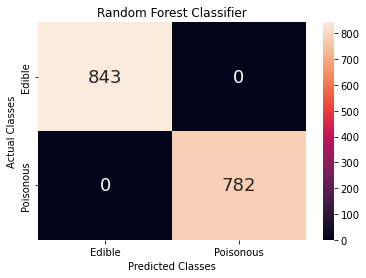

In [132]:
y_pred_RF = random_forest_cls_tuned.predict(x_test)

# Find confusion matrix for this model:
confusion_matrix_RF = confusion_matrix(y_test, y_pred_RF)

# Plot confusion matrix with Heatmap:
cm_dataframe_RF = pd.DataFrame(confusion_matrix_RF, index=["Edible", "Poisonous"], columns=["Edible", "Poisonous"])
sns.heatmap(cm_dataframe_RF, annot=True, annot_kws={"size": 18}, fmt="d")
plt.title("Random Forest Classifier")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
plt.show()

In [135]:
report_RF = pd.DataFrame(classification_report(y_test, y_pred_RF, 
                                               output_dict=True, 
                                               target_names=["Edible", "Poisonous"]))
report_RF

,Edible,Poisonous,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,843.0,782.0,1.0,1625.0,1625.0


In [136]:
# . Evaluating K-NN

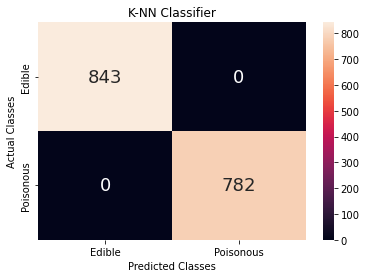

In [137]:
y_pred_KNN = knn_cls_tuned.predict(x_test)

# Find confusion matrix for this model:
confusion_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)

# Plot confusion matrix with Heatmap:
cm_dataframe_KNN = pd.DataFrame(confusion_matrix_KNN, index=["Edible", "Poisonous"], columns=["Edible", "Poisonous"])
sns.heatmap(cm_dataframe_KNN, annot=True, annot_kws={"size": 18}, fmt="d")
plt.title("K-NN Classifier")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
plt.show()

In [138]:
report_KNN = pd.DataFrame(classification_report(y_test, y_pred_KNN, 
                                                output_dict=True, 
                                                target_names=["Edible", "Poisonous"]))
report_KNN

,Edible,Poisonous,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,843.0,782.0,1.0,1625.0,1625.0


In [139]:
#  Evaluating Gaussian Naive Bayes Model

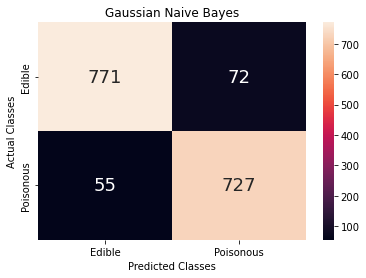

In [140]:
y_pred_GNB = naive_bayes_cls_tuned.predict(x_test)

# Find confusion matrix for this model:
confusion_matrix_GNB = confusion_matrix(y_test, y_pred_GNB)

# Plot confusion matrix with Heatmap:
cm_dataframe_GNB = pd.DataFrame(confusion_matrix_GNB, index=["Edible", "Poisonous"], columns=["Edible", "Poisonous"])
sns.heatmap(cm_dataframe_GNB, annot=True, annot_kws={"size": 18}, fmt="d")
plt.title("Gaussian Naive Bayes")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
plt.show()

In [141]:
report_GNB = pd.DataFrame(classification_report(y_test, y_pred_GNB, 
                                                output_dict=True, 
                                                target_names=["Edible", "Poisonous"]))
report_GNB

,Edible,Poisonous,accuracy,macro avg,weighted avg
precision,0.933414,0.909887,0.921846,0.921651,0.922092
recall,0.914591,0.929668,0.921846,0.922129,0.921846
f1-score,0.923907,0.919671,0.921846,0.921789,0.921868
support,843.000000,782.000000,0.921846,1625.000000,1625.000000


In [142]:
# RESULTS

In [144]:
# Create list that keep model names:
model_names = ["Logistic Regression","Decision Tree Classification" ,"Random Forest Classification", "K-NN Classifiaction", "Gaussian Naive Bayes"]
               
# Shortening models' variables names for quick usage:
LR_model = logistic_regression_cls_tuned
DT_model = decision_tree_cls_tuned
RF_model = random_forest_cls_tuned
KNN_model = knn_cls_tuned
GNB_model = naive_bayes_cls_tuned

# Get model hyperparameters into variables:
LR_model_C = str(LR_model.get_params()["C"])
LR_model_penalty = str(LR_model.get_params()["penalty"])
DT_mode_max_depth = str(DT_model.get_params()["max_depth"])
RF_model_n_estimators = str(RF_model.get_params()["n_estimators"])
RF_model_max_depth = str(RF_model.get_params()["max_depth"])
KNN_model_n_neighbors = str(KNN_model.get_params()["n_neighbors"])

# Create list that keep model hyperparameters:
model_params = ["C=" + LR_model_C + ", penalty=" + LR_model_penalty,
                "None",
                "max_depth=" + DT_mode_max_depth,
                "n_estimators=" + RF_model_n_estimators + ", max_depth=" + RF_model_max_depth,
                "n_neighbors=" + KNN_model_n_neighbors]

# Create list that keep models' training accuracies:
model_training_accuracies = [LR_model.score(x_train, y_train),DT_model.score(x_train, y_train), RF_model.score(x_train, y_train),
                             KNN_model.score(x_train, y_train),GNB_model.score(x_train, y_train)]


# Create list that keep models' testing accuracies:
model_testing_accuracies = [LR_model.score(x_test, y_test),
                             DT_model.score(x_test, y_test),
                             RF_model.score(x_test, y_test),
                             KNN_model.score(x_test, y_test),
                              GNB_model.score(x_test, y_test)]

# Create list that keep models' F1 scores:
model_f1_scores = [report_LR.iloc[0]["weighted avg"],
                   report_DT.iloc[0]["weighted avg"],
                   report_RF.iloc[0]["weighted avg"],
                   report_KNN.iloc[0]["weighted avg"],
                   report_GNB.iloc[0]["weighted avg"]]


# Create list that keep models' precisions:
model_precisions = [report_LR.iloc[1]["weighted avg"],
                   report_DT.iloc[1]["weighted avg"],
                   report_RF.iloc[1]["weighted avg"],
                   report_KNN.iloc[1]["weighted avg"],
                   report_GNB.iloc[1]["weighted avg"]]

# Create list that keep models' recalls:
model_recalls = [report_LR.iloc[2]["weighted avg"],
                report_DT.iloc[2]["weighted avg"],
                report_RF.iloc[2]["weighted avg"],
                report_KNN.iloc[2]["weighted avg"],
                report_GNB.iloc[2]["weighted avg"]]
                             
    
    # Generate table data with column names:
table_data = {"Parameters" : model_params,
              "Training Accuracy" : model_training_accuracies,
              "Testing Accuracy" : model_testing_accuracies,
              "F1 Score" : model_f1_scores,
              "Precision" : model_precisions,
              "Recall" : model_recalls}
            

   # Create and print result table:
table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe                          
                             


,Parameters,Training Accuracy,Testing Accuracy,F1 Score,Precision,Recall
Logistic Regression,"C=0.1, penalty=l2",0.950454,0.947077,0.947075,0.947077,0.947074
Decision Tree Classification,None,1.000000,1.000000,1.000000,1.000000,1.000000
Random Forest Classification,max_depth=14,1.000000,1.000000,1.000000,1.000000,1.000000
K-NN Classifiaction,"n_estimators=100, max_depth=8",1.000000,1.000000,1.000000,1.000000,1.000000
Gaussian Naive Bayes,n_neighbors=3,0.923527,0.921846,0.922092,0.921846,0.921868


In [145]:
# Decision tree, Random Forestand  KNN are the best model to predict mushrooms data.